In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Sharan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Changing Pandas Options to make it show all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the Train data into Pandas DataFrame
df = pd.read_csv("Train.csv")

In [5]:
# View first few records of the table
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [6]:
# View DataFrame Summary
df.info()
# From Below summary of the data, we can infer that there are a total of 7000 rows.
# Missing values exist
# Target Variable(Dependent Feature) is 'Attrition_rate'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [7]:
# Displaying basic descriptive statistical measures of numerical features
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [8]:
# Basic Observations of Categorical and Object Columns
df.describe(include='O')

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
count,7000,7000,7000,7000,7000,7000,7000
unique,7000,2,2,5,12,4,5
top,EID_24608,F,Married,Lebanon,IT,Conceptual,type2
freq,1,4114,4520,2070,1394,1756,3945


In [9]:
# Number of null values in each column
df.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [10]:
# Subsetting dataFrame where 'Age' column has null values
df[df['Age'].isnull()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,23,1,4,6.0,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
15,EID_20121,F,NaN,3,Married,Springfield,Logistics,Analytical,0.0,0,32,1,2,6.0,type2,2.0,3,0.7516,-1.6150,1.0,3,8,3,0.1331
25,EID_3901,F,NaN,2,Married,Washington,Marketing,Directive,15.0,1,58,1,3,3.0,type2,1.0,3,-0.1048,-0.4537,1.0,4,8,2,0.8727
40,EID_17527,F,NaN,2,Married,Springfield,IT,Conceptual,4.0,1,72,2,5,6.0,type3,2.0,3,-1.8176,0.7075,2.0,5,6,2,0.0618
43,EID_1433,M,NaN,3,Married,Springfield,Logistics,Conceptual,19.0,3,51,1,2,4.0,type2,2.0,5,0.7516,1.8688,2.0,3,8,3,0.1571
54,EID_1297,M,NaN,4,Married,Springfield,IT,Directive,24.0,4,52,0,2,5.0,type3,3.0,3,-1.8176,-0.4537,1.0,3,9,4,0.0449
97,EID_22742,F,NaN,4,Married,Lebanon,Human Resource Management,Analytical,19.0,4,27,1,3,5.0,type2,4.0,4,-1.8176,-0.4537,3.0,2,5,3,0.0163
101,EID_13859,M,NaN,4,Married,Lebanon,Operarions,Behavioral,3.0,2,36,0,3,5.0,type2,2.0,4,0.7516,0.7075,3.0,3,5,3,0.1309
116,EID_17036,M,NaN,2,Married,Franklin,Operarions,Directive,5.0,3,47,0,1,6.0,type4,1.0,3,-0.1048,0.7075,NaN,4,6,3,0.2365
144,EID_25188,F,NaN,3,Single,Springfield,R&D,Analytical,18.0,4,69,1,3,4.0,type2,1.0,4,-0.9612,-0.4537,2.0,2,7,2,0.0211


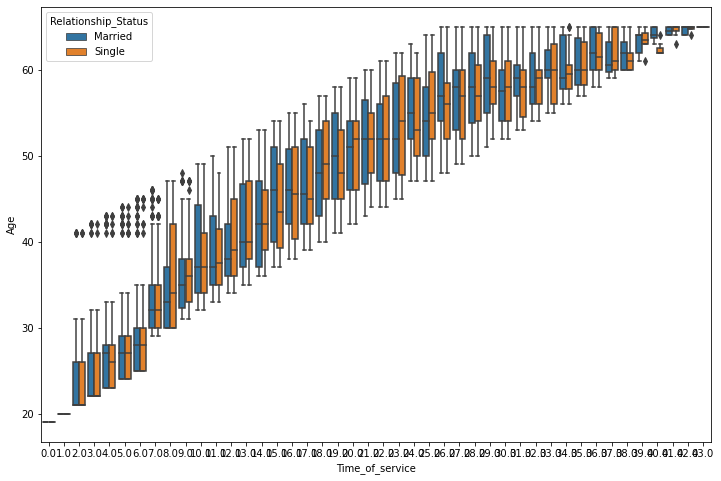

In [11]:
# Check relation between 'Time_of_service' and 'Age'
plt.figure(figsize=(12,8))
sns.boxplot(y='Age',x='Time_of_service',data=df,hue='Relationship_Status')
# From the below figure, it is clear that Age is directly related(proportional) to Time_of_service

In [12]:
# Make a deep copy of the DataFrame for backup
# Deep copy is a copy that does not affect the original DataFrame upon making changes
df2 = df.copy()

In [13]:
# Imputing missing values 
df['Age'].fillna(method='ffill',inplace=True)

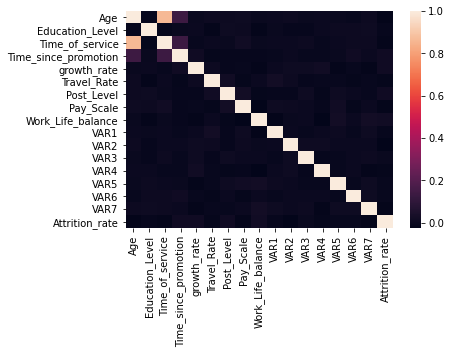

In [14]:
# Plot Heatmap to see correlation between Features.
sns.heatmap(df.corr())

In [15]:
# Dropping missing values and Removing unnecessary columns
df.dropna(inplace=True)
df.drop('Employee_ID',inplace=True,axis=1)

In [16]:
# Columns in the DataFrame
df.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate'],
      dtype='object')

In [17]:
# Checking Data types of columns
df.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [18]:
# Re-check for missing values
df.isnull().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [19]:
# One-hot encoding to convert categorical/object data-type cols to numeric data-type
to_be_dummied = ['Gender','Relationship_Status',
                'Hometown','Unit','Decision_skill_possess',
                'Compensation_and_Benefits']

# Make a copy of the DataFrame
df3 = df.copy()

# Iterating over columns and making dummy columns
# (One-hot-encoding with Pandas.get_dummies)
for column in to_be_dummied:
    dummy = pd.get_dummies(df[column],drop_first=True)
    df = pd.concat([df,dummy],axis=1)
    df.drop(column,axis=1,inplace=True)

In [20]:
# Now, see the columns
df.columns

Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate', 'M', 'Single', 'Franklin', 'Lebanon',
       'Springfield', 'Washington', 'Human Resource Management', 'IT',
       'Logistics', 'Marketing', 'Operarions', 'Production', 'Purchasing',
       'Quality', 'R&D', 'Sales', 'Security', 'Behavioral', 'Conceptual',
       'Directive', 'type1', 'type2', 'type3', 'type4'],
      dtype='object')

## Split the Data into Train set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Attrition_rate',axis=1),
                                                   df['Attrition_rate'],test_size=0.1)

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Co-efficients
linear.coef_

array([ 4.23185902e-05, -9.42348968e-04, -3.15799245e-04,  3.65774878e-03,
        5.92060823e-05, -3.58801885e-03,  2.31110214e-03, -1.18042443e-03,
        3.63062824e-03, -2.13438672e-03, -4.33353965e-03,  1.43010222e-03,
       -2.93030052e-03, -1.34594822e-03,  1.73837082e-04, -3.77853161e-03,
        7.70465286e-03,  2.36774332e-03, -3.82158456e-03, -8.08011771e-03,
        3.04135556e-03, -4.67287574e-03, -1.05853122e-02, -1.04852862e-02,
       -2.66502458e-03,  6.73294634e-03,  1.60221700e-02,  8.38737064e-03,
        1.86620227e-02,  8.98805089e-03,  1.33063492e-02,  4.44336896e-03,
       -5.92478069e-03, -1.05063577e-02,  1.71113960e-03,  4.22273012e-03,
       -5.80172060e-02, -5.26499028e-02, -5.75051480e-02, -5.27346755e-02])

In [25]:
# Make predictions
predictions = linear.predict(X_test)

In [26]:
# Display fist few predictions
predictions[:5]

array([0.18060843, 0.20751798, 0.1705778 , 0.19880183, 0.19977609])

In [27]:
# Calculating metrics for assessing performance
from sklearn import metrics

# Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
# Mean Square Error
print('MSE:', metrics.mean_squared_error(y_test, predictions))
# Root Mean Square Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.12244922868148649
MSE: 0.031938767379888156
RMSE: 0.17871420587040124


# Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
# Make Predictions
rfc_pred = rfc.predict(X_test)

In [30]:
# Display fist few predictions
rfc_pred[:5]

array([0.2106716 , 0.20557   , 0.18985335, 0.229506  , 0.182935  ])

In [31]:
# Calculating metrics for assessing performance
from sklearn import metrics

# Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, rfc_pred))
# Mean Square Error
print('MSE:', metrics.mean_squared_error(y_test, rfc_pred))
# Root Mean Square Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))

MAE: 0.12860826395246322
MSE: 0.032917493314312485
RMSE: 0.1814317869457072


### Linear Regression seems to be fitting better for our data.

# Predictions for Submission

In [32]:
test = pd.read_csv(r"C:\Users\Sharan\Desktop\Github\Test.csv")

In [33]:
# Impute Missing Values
final_employee = test['Employee_ID']
test.interpolate(inplace=True)

In [34]:
# One-hot Encoding
test.drop('Employee_ID',inplace=True,axis=1)
for column in to_be_dummied:
    tempo = pd.get_dummies(test[column],drop_first=True)
    test = pd.concat([test,tempo],axis=1)
    test.drop(column,axis=1,inplace=True)

In [35]:
# View Columns
test.columns

Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'M', 'Single', 'Franklin', 'Lebanon', 'Springfield',
       'Washington', 'Human Resource Management', 'IT', 'Logistics',
       'Marketing', 'Operarions', 'Production', 'Purchasing', 'Quality', 'R&D',
       'Sales', 'Security', 'Behavioral', 'Conceptual', 'Directive', 'type1',
       'type2', 'type3', 'type4'],
      dtype='object')

In [36]:
# Make Predictions
final_predictions = linear.predict(test)
final_predictions[:5]

array([0.2188242 , 0.18574941, 0.19669986, 0.26695041, 0.20691638])

In [37]:
employee = list(final_employee)
print(len(employee))
predict = list(final_predictions)
print(len(predict))

3000
3000


In [38]:
# Result DataFrame
result = pd.DataFrame({'Employee_ID':employee,'Attrition_rate':predict},index=None)

In [39]:
# View Results
result.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.218824
1,EID_9658,0.185749
2,EID_22203,0.196700
3,EID_7652,0.266950
4,EID_6516,0.206916


In [40]:
# Saving DataFrame as csv file
result.to_csv('submissions.csv',index=False)